<h1>Testo Sensor Windchill Daten</h1>

The goal of this workbook is to visulize the data out of the dataexports from Windchill with labelencoding

<h2>Datenextrahierung und Preprocessing</h2>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import preprocessing

In [3]:
df_anschluss = pd.read_csv("../../res/data_windchill_export/sensor_anschluss.csv", decimal=",")
df_bajonett = pd.read_csv("../../res/data_windchill_export/sensor_bajonett.csv", decimal=",")
df_einschraub = pd.read_csv("../../res/data_windchill_export/sensor_einschraub.csv", decimal=",")
df_einstech = pd.read_csv("../../res/data_windchill_export/sensor_einstech.csv", decimal=",")
df_einsteck = pd.read_csv("../../res/data_windchill_export/sensor_einsteck.csv", decimal=",")
df_kabel = pd.read_csv("../../res/data_windchill_export/sensor_kabel.csv", decimal=",")
df_mte = pd.read_csv("../../res/data_windchill_export/sensor_mte.csv", decimal=",")
df_notmte = pd.read_csv("../../res/data_windchill_export/sensor_notmte.csv", decimal=",")
df_oberflaeche = pd.read_csv("../../res/data_windchill_export/sensor_oberflaeche.csv", decimal=",")
df_pushin = pd.read_csv("../../res/data_windchill_export/sensor_pushin.csv", decimal=",")
df_waermemengen = pd.read_csv("../../res/data_windchill_export/sensor_waermemenge.csv", decimal=",")
df_wand = pd.read_csv("../../res/data_windchill_export/sensor_wand.csv", decimal=",")

df = pd.concat([df_anschluss,df_bajonett, df_einschraub, df_einstech, df_einsteck, df_kabel, df_mte, df_notmte, df_oberflaeche, df_pushin, df_waermemengen, df_wand], ignore_index=True, sort=False)

df.to_csv("../../res/data_windchill_export/data.csv", index=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 51 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Objekttyp-Indikator                        666 non-null    object 
 1   Nummer                                     666 non-null    object 
 2   SAP_MATNR                                  666 non-null    object 
 3   BENENNUNG                                  666 non-null    object 
 4   Entwickelt für Kunde                       666 non-null    object 
 5   Branche/Applikation                        666 non-null    object 
 6   Einsatzzweck/Meßstelle                     666 non-null    object 
 7   Fertigungsstandort                         629 non-null    object 
 8   Projekt-Nr.                                629 non-null    object 
 9   Kundenartikel-Nr.                          629 non-null    object 
 10  Min.Einsatztemperatur [°C]

In [5]:
df.columns

Index(['Objekttyp-Indikator', 'Nummer', 'SAP_MATNR', 'BENENNUNG',
       'Entwickelt für Kunde', 'Branche/Applikation', 'Einsatzzweck/Meßstelle',
       'Fertigungsstandort', 'Projekt-Nr.', 'Kundenartikel-Nr.',
       'Min.Einsatztemperatur [°C]', 'Max.Einsatztemperatur [°C]',
       'Mit Leitung/Litze', 'Leitertechnik', 'IP-Schutzklasse',
       'Sensor Wärmeübertragung', 'Verpackungsart Text', 'Sensorart',
       'Sensordetails', 'Werkstoff Hülse/Gehäuse',
       'Außendurchmesser Hülsenspitze [mm]', 'Einbaulänge [mm]',
       'Werkstoff Leitung/Litze (Mantel)', 'Leitungsdetails',
       'Länge Leitung/Litze [mm]', 'Verbindungsart Hülse/Leitung bzw. Stecker',
       'Verbindungsart Sensor/Litze', 'Steckertechnik', 'Steckertyp',
       'Elektrischer Anschluss', 'Classification', 'Verpackungsart Code',
       'Schlüsselweite Prozessanschluss', 'Gewinde Prozessanschluss',
       'Gebogen', 'Länge Hülse [mm]', 'Mit Klemmfeder', 'TE-Typ',
       'ØD = Durchmesser TE-Spitze [mm]', 'Designt

In [ ]:
df.head()

In [7]:
df_copy = df.loc[:,["Classification","Min.Einsatztemperatur [°C]", "Max.Einsatztemperatur [°C]","Mit Leitung/Litze","Sensorart","Steckertyp", "Länge Hülse [mm]", "Außendurchmesser Hülsenspitze [mm]","Länge Leitung/Litze [mm]",]]
#df_copy = df.drop(["Objekttyp-Indikator", "Nummer", "BENENNUNG", "Entwickelt für Kunde", "Branche/Applikation", "Einsatzzweck/Meßstelle", "Fertigungsstandort", "Projekt-Nr.", "Kundenartikel-Nr.", "Verpackungsart Text", "Sensordetails", "Leitungsdetails", "Steckertechnik", "SAP_MATNR" ],axis=1)
df_copy.head()

,Classification,Min.Einsatztemperatur [°C],Max.Einsatztemperatur [°C],Mit Leitung/Litze,Sensorart,Steckertyp,Länge Hülse [mm],Außendurchmesser Hülsenspitze [mm],Länge Leitung/Litze [mm]
0,Part/Testo Sensor/Produkte/OEM-Fühler/Fühler m...,0,0,Ja,Pt,"Klemmleiste, 4 polig, / Wieland KL 16/4 PA, Be...",NaN,6.0,120.0
1,Part/Testo Sensor/Produkte/OEM-Fühler/Fühler m...,0,80,Ja,Pt,Anschlußkopf Typ MA,NaN,3.0,113.0
2,Part/Testo Sensor/Produkte/OEM-Fühler/Fühler m...,-40,100,Ja,Digital,JST: PHR-4,NaN,0.0,440.0
3,Part/Testo Sensor/Produkte/OEM-Fühler/Fühler m...,-40,100,Ja,Digital,JST: PHR-4,NaN,0.0,640.0
4,Part/Testo Sensor/Produkte/OEM-Fühler/Bajonett...,-20,150,Nein,NTC,Stocko MSEM 7715-002-003-960,NaN,3.0,0.0


In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Classification                      666 non-null    object 
 1   Min.Einsatztemperatur [°C]          666 non-null    int64  
 2   Max.Einsatztemperatur [°C]          666 non-null    int64  
 3   Mit Leitung/Litze                   666 non-null    object 
 4   Sensorart                           666 non-null    object 
 5   Steckertyp                          666 non-null    object 
 6   Länge Hülse [mm]                    586 non-null    float64
 7   Außendurchmesser Hülsenspitze [mm]  586 non-null    float64
 8   Länge Leitung/Litze [mm]            666 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 47.0+ KB


In [9]:
datatypes = df_copy.dtypes
object_labels = datatypes[datatypes == 'object'].index.tolist()
object_labels

['Classification', 'Mit Leitung/Litze', 'Sensorart', 'Steckertyp']

In [10]:
object_labels.remove('Classification')

In [12]:
#preprocessed_data = pd.get_dummies(df_copy, columns=["Mit Leitung/Litze", "IP-Schutzklasse"])
preprocessed_data = df_copy.copy()

label_encoder = preprocessing.LabelEncoder()

for i in object_labels:
    preprocessed_data[i] = label_encoder.fit_transform(preprocessed_data[i])

preprocessed_data.fillna(-1, inplace=True)
preprocessed_data_X = preprocessed_data.drop("Classification", axis=1)
preprocessed_data_Y = preprocessed_data.loc[:,"Classification"]
preprocessed_data.to_csv("../../res/data_windchill_export/data_preprocessed.csv", index=False)
preprocessed_data_X.head()

,Min.Einsatztemperatur [°C],Max.Einsatztemperatur [°C],Mit Leitung/Litze,Sensorart,Steckertyp,Länge Hülse [mm],Außendurchmesser Hülsenspitze [mm],Länge Leitung/Litze [mm]
0,0,0,0,3,36,-1.0,6.0,120.0
1,0,80,0,3,5,-1.0,3.0,113.0
2,-40,100,0,0,32,-1.0,0.0,440.0
3,-40,100,0,0,32,-1.0,0.0,640.0
4,-20,150,1,2,88,-1.0,3.0,0.0


<h3>Normalisierung</h3>

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
normalized_data_X = preprocessed_data_X.copy()

normalized_data_X["Länge Leitung/Litze [mm]"] = min_max_scaler.fit_transform(np.array(normalized_data_X["Länge Leitung/Litze [mm]"]).reshape(-1,1))
normalized_data_X["Max.Einsatztemperatur [°C]"] = min_max_scaler.fit_transform(np.array(normalized_data_X["Max.Einsatztemperatur [°C]"]).reshape(-1,1))
normalized_data_X["Min.Einsatztemperatur [°C]"] = min_max_scaler.fit_transform(np.array(normalized_data_X["Min.Einsatztemperatur [°C]"]).reshape(-1,1))

<h2>Visualisierung</h2>
<h3>2D</h3>

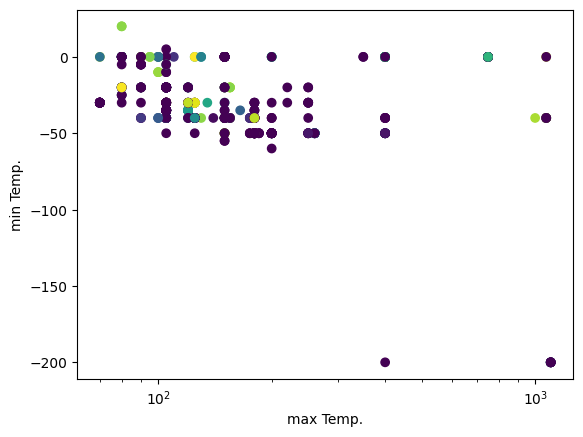

In [20]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(preprocessed_data_X["Max.Einsatztemperatur [°C]"],preprocessed_data_X["Min.Einsatztemperatur [°C]"], c=preprocessed_data_X["Steckertyp"])
ax.set_xscale('log')
ax.set_xlabel("max Temp.")
ax.set_ylabel("min Temp.")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split( preprocessed_data.drop("SAP_MATNR", axis=1), preprocessed_data["SAP_MATNR"], test_size = 0.3, random_state = 100)

In [ ]:
""" for i in object_labels:
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(preprocessed_data_X["Max.Einsatztemperatur [°C]"],preprocessed_data_X["Min.Einsatztemperatur [°C]"],preprocessed_data_X["Länge Leitung/Litze [mm]"] ,c=preprocessed_data_X[i])
    plt.title(i)
    ax.set_xlabel("Max.Einsatztemperatur [°C]")
    ax.set_ylabel("Min.Einsatztemperatur [°C]")
    ax.set_zlabel("Länge Leitung/Litze [mm]")
    plt.show() """

' for i in object_labels:\n    fig = plt.figure()\n    ax = fig.add_subplot(projection=\'3d\')\n    ax.scatter(preprocessed_data_X["Max.Einsatztemperatur [°C]"],preprocessed_data_X["Min.Einsatztemperatur [°C]"],preprocessed_data_X["Länge Leitung/Litze [mm]"] ,c=preprocessed_data_X[i])\n    plt.title(i)\n    ax.set_xlabel("Max.Einsatztemperatur [°C]")\n    ax.set_ylabel("Min.Einsatztemperatur [°C]")\n    ax.set_zlabel("Länge Leitung/Litze [mm]")\n    plt.show() '

In [ ]:
""" for i in object_labels:
    fig = px.scatter_3d(normalized_data_X, x='Max.Einsatztemperatur [°C]', y="Min.Einsatztemperatur [°C]", z="Länge Leitung/Litze [mm]", color=i, log_y=True,log_x=True, log_z=True)
    fig.show() """

' for i in object_labels:\n    fig = px.scatter_3d(normalized_data_X, x=\'Max.Einsatztemperatur [°C]\', y="Min.Einsatztemperatur [°C]", z="Länge Leitung/Litze [mm]", color=i, log_y=True,log_x=True, log_z=True)\n    fig.show() '

<h3>Heatmap</h3>

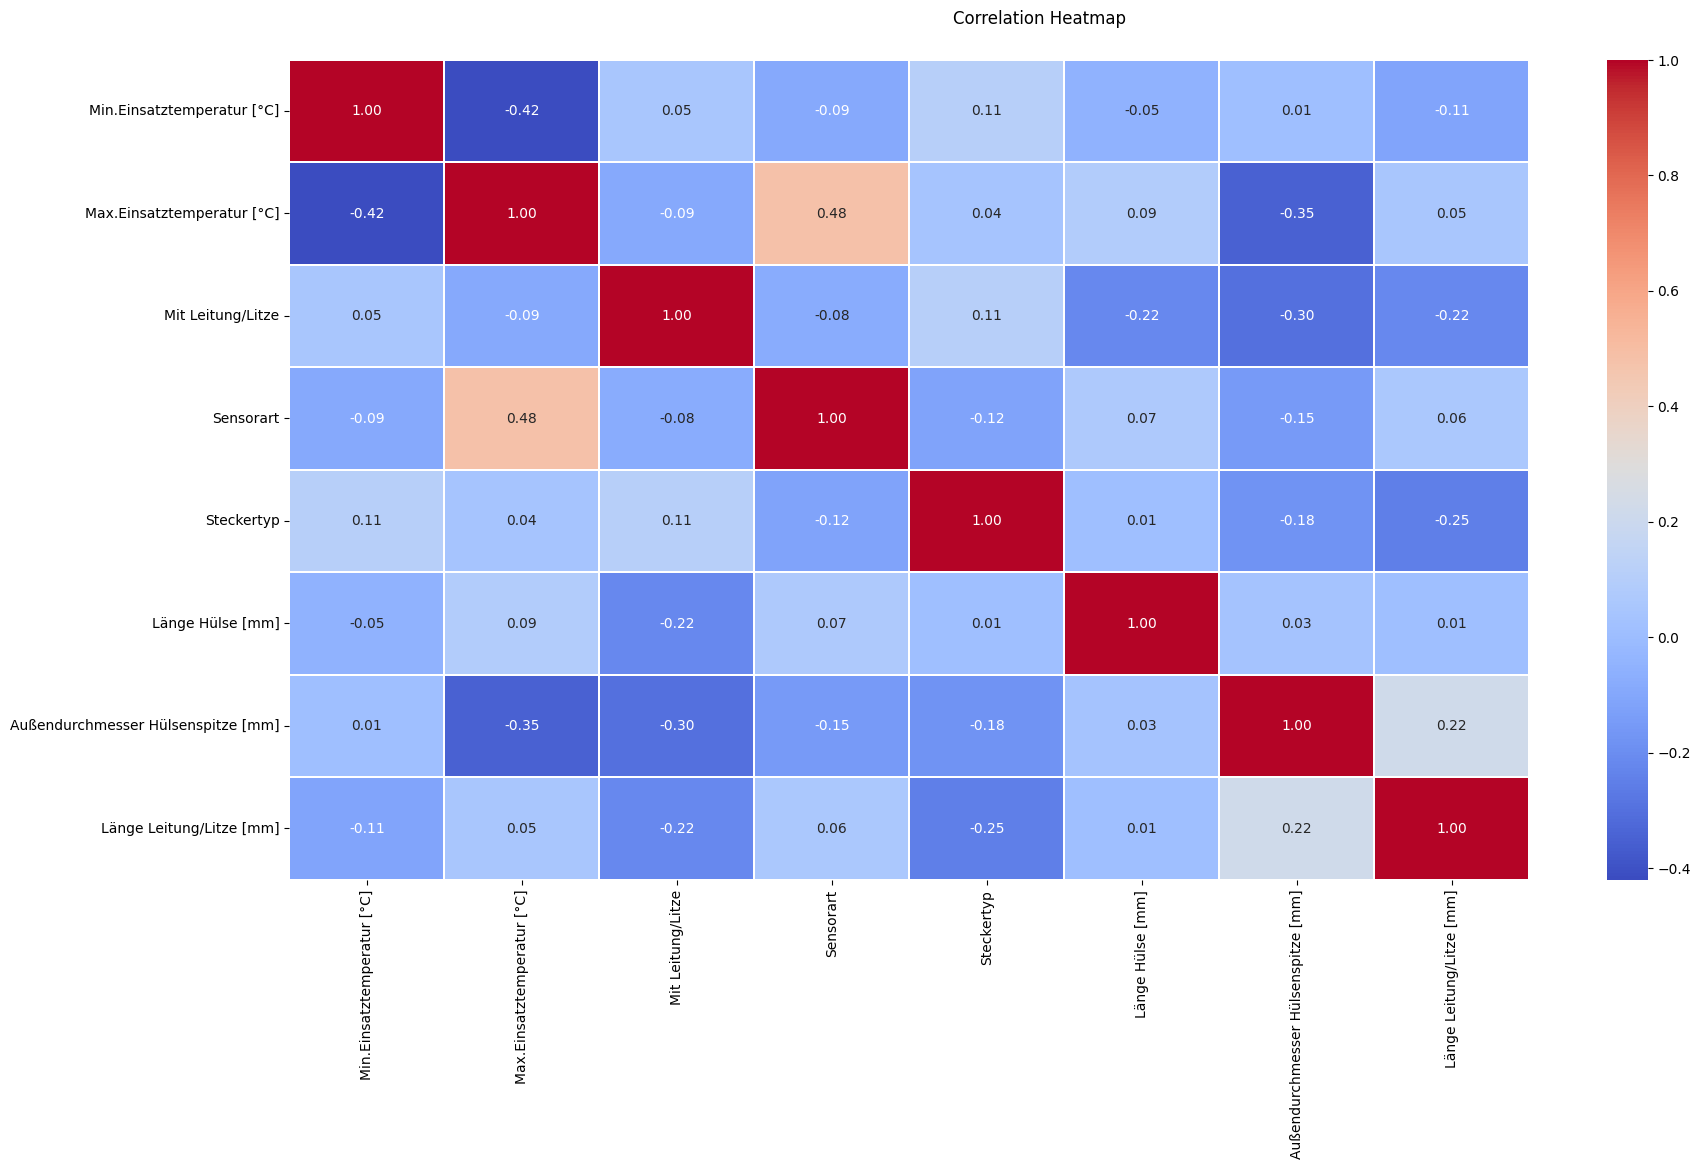

In [ ]:
f, ax = plt.subplots(figsize=(20,10))
corr = preprocessed_data_X.corr()

hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm", fmt=".2f", linewidths=.05)

f.subplots_adjust(top=0.93)

t = f.suptitle('Correlation Heatmap')

<h2>UMAP</h2>

In [ ]:
import umap
from sklearn.preprocessing import StandardScaler

In [ ]:
reducer = umap.UMAP(n_neighbors=20, min_dist=0.1, n_components=3)

In [ ]:
scaled_data = StandardScaler().fit_transform(preprocessed_data_X)

In [ ]:
#for i in range(4):   
    #embedding = reducer.fit_transform(scaled_data) 
    #fig = plt.figure()
    #ax = fig.add_subplot()
    #ax.scatter(embedding[:,0],embedding[:,1], c=[[x] for x in label_encoder.fit_transform(preprocessed_data_Y)])
    #plt.show()

In [ ]:
for i in range(3):
    embedding = reducer.fit_transform(scaled_data)
    
    fig = px.scatter_3d(embedding, x=0, y=1, z=2, color=preprocessed_data_Y, color_discrete_sequence=[ "orange", "red", "green", "blue", "purple","lightskyblue", "brown", "darkgreen","darkmagenta","pink", "wheat","plum"  ], log_x= True)
    fig.show()

<h2>PCA</h2>

In [ ]:
from sklearn.decomposition import PCA

<h3>2D</h3>

In [ ]:
pca = PCA(n_components=2)

In [ ]:
embedding = pca.fit_transform(scaled_data)
embedding_df = pd.DataFrame(embedding, columns=['PC1', 'PC2'])
embedding_df["Classification"] = preprocessed_data_Y
#embedding_df = embedding_df[embedding_df["Classification"] == "Part/Testo Sensor/Produkte/OEM-Fühler/Fühler mit Anschlusskopf"]
min_value = embedding_df[['PC1', 'PC2']].values.min()
if min_value < 0:
    shift = abs(min_value)
    embedding_df[['PC1', 'PC2']] += shift


fig = px.scatter(embedding_df, x='PC1', y='PC2', color=embedding_df["Classification"], 
                    color_discrete_sequence=[ "orange", "red", "green", "blue", "purple","lightskyblue", "brown", "darkgreen","darkmagenta","pink", "wheat","plum" ],
                    log_x=True, log_y=False )
fig.show()

<h3>3D</h3>

In [ ]:
pca = PCA(n_components=3)

In [ ]:
embedding = pca.fit_transform(scaled_data)
embedding_df = pd.DataFrame(embedding, columns=['PC1', 'PC2', 'PC3'])
embedding_df["Classification"] = preprocessed_data_Y
#embedding_df = embedding_df[embedding_df["Classification"] == "Part/Testo Sensor/Produkte/OEM-Fühler/Fühler mit Anschlusskopf"]
min_value = embedding_df[['PC1', 'PC2', 'PC3']].values.min()
if min_value < 0:
    shift = abs(min_value)
    embedding_df[['PC1', 'PC2', 'PC3']] += shift


fig = px.scatter_3d(embedding_df, x='PC1', y='PC2', z='PC3', color=embedding_df["Classification"], 
                    color_discrete_sequence=[ "orange", "red", "green", "blue", "purple","lightskyblue", "brown", "darkgreen","darkmagenta","pink", "wheat","plum" ],
                    log_x=True, log_y=False, log_z=True )
fig.show()

<h2>Clustering</h2>


In [ ]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

<h3>Unnormalisiert</h3>
<h4>Visualisierung</h4>

In [ ]:
k_means = KMeans(n_clusters=3)
k_means.fit(preprocessed_data_X)
#k_means.labels_

KMeans(n_clusters=3)

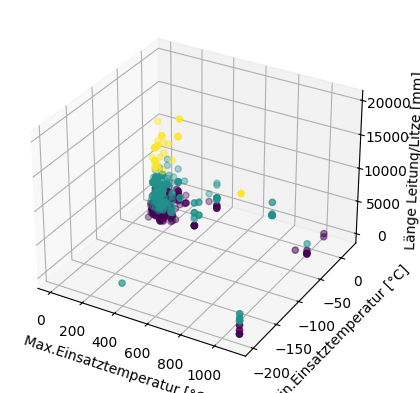

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(preprocessed_data_X["Max.Einsatztemperatur [°C]"],preprocessed_data_X["Min.Einsatztemperatur [°C]"],preprocessed_data_X["Länge Leitung/Litze [mm]"] ,c=k_means.labels_)
ax.set_xlabel("Max.Einsatztemperatur [°C]")
ax.set_ylabel("Min.Einsatztemperatur [°C]")
ax.set_zlabel("Länge Leitung/Litze [mm]")
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.05, min_samples=4)
dbscan.fit(preprocessed_data_X)
#dbscan.labels_

DBSCAN(eps=0.05, min_samples=4)

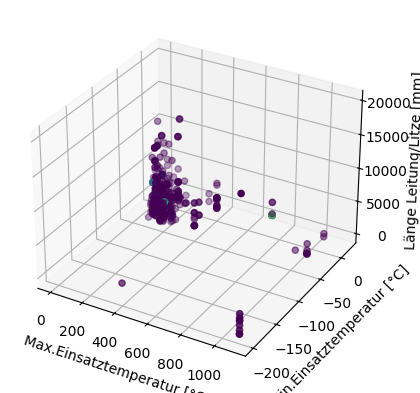

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(preprocessed_data_X["Max.Einsatztemperatur [°C]"],preprocessed_data_X["Min.Einsatztemperatur [°C]"],preprocessed_data_X["Länge Leitung/Litze [mm]"] ,c=dbscan.labels_)
ax.set_xlabel("Max.Einsatztemperatur [°C]")
ax.set_ylabel("Min.Einsatztemperatur [°C]")
ax.set_zlabel("Länge Leitung/Litze [mm]")
plt.show()

<h4>Evaluation<h4>

In [ ]:
print("DB score ",davies_bouldin_score(preprocessed_data_X, k_means.labels_))
print("Silhouette ",silhouette_score(preprocessed_data_X, k_means.labels_))

DB score  0.5436736158186476
Silhouette  0.5666367601845039


In [ ]:
print("DB score ",davies_bouldin_score(preprocessed_data_X, dbscan.labels_))
print("Silhouette ",silhouette_score(preprocessed_data_X, dbscan.labels_))

DB score  2.0618822659536957
Silhouette  -0.6351134057022365


<h3>Normalisiert</h3>
<h4>Visualisierung</h4>

In [ ]:
k_means = KMeans(n_clusters=3)
k_means.fit(normalized_data_X)
#k_means.labels_

KMeans(n_clusters=3)

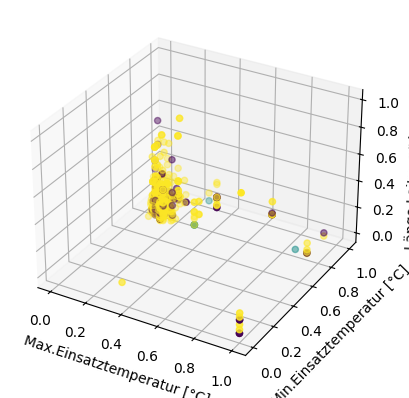

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(normalized_data_X["Max.Einsatztemperatur [°C]"],normalized_data_X["Min.Einsatztemperatur [°C]"],normalized_data_X["Länge Leitung/Litze [mm]"] ,c=k_means.labels_)
ax.set_xlabel("Max.Einsatztemperatur [°C]")
ax.set_ylabel("Min.Einsatztemperatur [°C]")
ax.set_zlabel("Länge Leitung/Litze [mm]")
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.05, min_samples=4)
dbscan.fit(normalized_data_X)
#dbscan.labels_

DBSCAN(eps=0.05, min_samples=4)

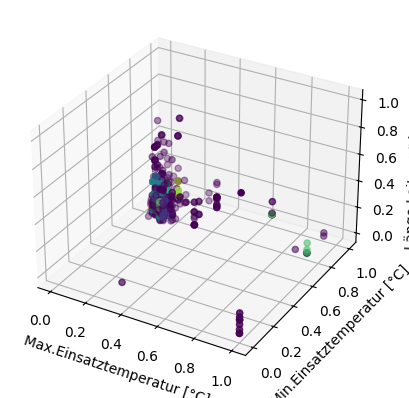

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(normalized_data_X["Max.Einsatztemperatur [°C]"],normalized_data_X["Min.Einsatztemperatur [°C]"],normalized_data_X["Länge Leitung/Litze [mm]"] ,c=dbscan.labels_)
ax.set_xlabel("Max.Einsatztemperatur [°C]")
ax.set_ylabel("Min.Einsatztemperatur [°C]")
ax.set_zlabel("Länge Leitung/Litze [mm]")
plt.show()

<h4>Evaluation</h4>

In [ ]:
print("DB score ",davies_bouldin_score(normalized_data_X, k_means.labels_))
print("Silhouette ",silhouette_score(normalized_data_X, k_means.labels_))

DB score  0.5621982126435968
Silhouette  0.5893686883253867


In [ ]:
print("DB score ",davies_bouldin_score(normalized_data_X, dbscan.labels_))
print("Silhouette ",silhouette_score(normalized_data_X, dbscan.labels_))

DB score  1.7050967691491692
Silhouette  -0.20406306492330697


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)


In [ ]:
X_test.head()

In [ ]:
knn.predict(X_test)

In [ ]:
from scipy.spatial import distance
from sklearn.metrics import jaccard_score

In [ ]:
X_test.iloc[1]

In [ ]:
distances = []
for i in X_train:
    e_distance = 1 - jaccard_score(X_test.iloc[1],i)
    distances.append({i:e_distance})

In [ ]:
distances